## **Examen 2 - Analisis Predictivo**
Sofía Weintraub - 62583

El objetivo de este trabajo práctico es predecir el rating promedio de los diferentes tipos de títulos

## Lectura Base de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive' , force_remount = True)
with open("/content/drive/My Drive/kaggle.json" , 'r') as f:
  api_token = json.load(f)

  with open('/root/.kaggle/kaggle.json' , 'w') as file:
    json.dump(api_token , file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c ap-tp2-2q2022

import zipfile
import os

os.listdir()

for file in os.listdir():
  if file.endswith('.zip'):
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Mounted at /content/drive
 96% 49.0M/51.3M [00:02<00:00, 30.8MB/s]
100% 51.3M/51.3M [00:02<00:00, 20.9MB/s]


In [ ]:
base = pd.read_csv("origen.csv")
test = pd.read_csv("testear.csv")

## Análisis Exploratorio de Datos

In [ ]:
base.head(5)

,Id,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,...,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,video
0,0,6.0,7,tvSeries,0.0,2019,0,0,News,"nm1635586,nm1230149,nm2085337",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6.9,42,tvEpisode,0.0,2011,0,46,"Comedy,Crime,Drama",nm3398609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7.8,8,tvEpisode,0.0,2016,0,45,"Documentary,History",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8.2,115,tvEpisode,0.0,1992,0,30,"Comedy,Drama",nm0067621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.8,74,movie,0.0,1961,0,103,Western,nm0060430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977541 entries, 0 to 977540
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Id                    977541 non-null  int64  
 1   averageRating         977541 non-null  float64
 2   numVotes              977541 non-null  int64  
 3   titleType             977541 non-null  object 
 4   isAdult               977541 non-null  float64
 5   startYear             977541 non-null  int64  
 6   endYear               977541 non-null  int64  
 7   runtimeMinutes        977541 non-null  int64  
 8   genres_x              977540 non-null  object 
 9   directors             977541 non-null  object 
 10  writers               977541 non-null  object 
 11  seasonNumber          438133 non-null  float64
 12  episodeNumber         438133 non-null  float64
 13  ordering              370842 non-null  float64
 14  language              370842 non-null  object 
 15  

In [ ]:
#Tamaño
print('Cantidad de Filas y Columnas:',base.shape)

#Columnas
print('Nombre columnas:',base.columns)

Cantidad de Filas y Columnas: (977541, 31)
Nombre columnas: Index(['Id', 'averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'attributes',
       'isOriginalTitle', 'adult', 'budget', 'genres_y', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video'],
      dtype='object')


In [ ]:
#Registros Duplicados
base.duplicated().sum()

#No hay duplicados

0

In [ ]:
#Descripcion Estadistica
base.describe()

,Id,averageRating,numVotes,isAdult,startYear,endYear,runtimeMinutes,seasonNumber,episodeNumber,ordering,isOriginalTitle,budget,popularity,revenue,runtime
count,977541.000000,977541.000000,9.775410e+05,977541.000000,977541.000000,977541.000000,977541.000000,438133.000000,438133.000000,370842.000000,370842.000000,4.730500e+04,47302.000000,4.730200e+04,47096.000000
mean,488770.000000,6.881284,1.618633e+03,0.020805,1999.361582,57.984245,41.390972,4.035528,55.038682,3.475165,0.000019,6.233607e+06,3.450543,1.878803e+07,94.550195
std,282191.924084,1.405724,2.464842e+04,2.047549,34.239280,335.860575,63.656491,9.920419,580.403448,5.128331,0.004345,2.320708e+07,7.564531,9.347703e+07,35.454687
min,0.000000,1.000000,5.000000e+00,0.000000,0.000000,0.000000,-29745.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,244385.000000,6.100000,9.000000e+00,0.000000,1992.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000e+00,0.442414,0.000000e+00,85.000000
50%,488770.000000,7.100000,2.200000e+01,0.000000,2008.000000,0.000000,27.000000,2.000000,8.000000,2.000000,0.000000,0.000000e+00,1.282498,0.000000e+00,95.000000
75%,733155.000000,7.900000,9.200000e+01,0.000000,2015.000000,0.000000,73.000000,4.000000,16.000000,3.000000,0.000000,0.000000e+00,4.680878,0.000000e+00,106.000000
max,977540.000000,10.000000,2.425542e+06,2020.000000,2021.000000,2022.000000,14400.000000,1996.000000,15762.000000,162.000000,1.000000,3.800000e+08,547.488298,2.787965e+09,1140.000000


## Missings


Es importante determinar la prevalencia de los datos faltantes y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra

In [ ]:
total = base.isnull().sum()
total1 = base.isnull().sum().sort_values(ascending = False)
percent = (base.isnull().sum() / base.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
tagline,953733,0.975645
overview,931029,0.952419
runtime,930445,0.951822
status,930312,0.951686
release_date,930307,0.951681
original_language,930247,0.951619
video,930239,0.951611
revenue,930239,0.951611
production_countries,930239,0.951611
production_companies,930239,0.951611


In [ ]:
total_cells = np.product(base.shape)
total_missing = total.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

54.625508488696006


In [ ]:
def faltantes (base):
  porcentajes = (base.isnull().sum()/len(base))*100
  columnas = porcentajes.keys()
  columnas_drop = []
  
  for columna in columnas:
    if porcentajes[columna] > 95:
      columnas_drop.append(columna)
  return columnas_drop

base = base.drop(columns = faltantes(base), axis=1)
base = base.drop(columns = 'attributes' , axis=1)
test = test.drop(columns = faltantes(test), axis=1)
test = test.drop(columns = 'attributes' , axis=1)

In [ ]:
(base.isnull().sum()/len(base))*100

Id                  0.000000
averageRating       0.000000
numVotes            0.000000
titleType           0.000000
isAdult             0.000000
startYear           0.000000
endYear             0.000000
runtimeMinutes      0.000000
genres_x            0.000102
directors           0.000000
writers             0.000000
seasonNumber       55.180090
episodeNumber      55.180090
ordering           62.063791
language           62.063791
isOriginalTitle    62.063791
dtype: float64

## Tratamiento Missings

**Variable *genres_x***

In [ ]:
generos = base['genres_x'].str.get_dummies(sep=',')
base = pd.concat([base,generos], axis= 1)

In [ ]:
generos = test['genres_x'].str.get_dummies(sep=',')
test = pd.concat([test,generos], axis= 1)

**Variable *ordering***

In [ ]:
promord = round(base['ordering'].mean())
base['ordering'] = pd.to_numeric(base.ordering,errors='coerce').fillna(promord).astype('int16')
test['ordering'] = pd.to_numeric(test.ordering,errors='coerce').fillna(promord).astype('int16')

**Variable *language***

In [ ]:
base.language.unique()

array(['0', nan, 'en', 'es', 'yi', 'haw', 'fr', 'myv'], dtype=object)

In [ ]:
base.loc[base['language'].isnull(), 'language'] = '0'
base.loc[base['language'] == "0", 'language'] = '0'
base.loc[base['language'] == "en", 'language'] = '1'
base.loc[base['language'] == "es", 'language'] = '2'
base.loc[base['language'] == "yi", 'language'] = '3'
base.loc[base['language'] == "haw", 'language'] = '4'
base.loc[base['language'] == "fr", 'language'] = '5'
base.loc[base['language'] == "myv", 'language'] = '6'

In [ ]:
base['language'] = pd.to_numeric(base.language,errors='coerce').astype('int16')

In [ ]:
test.loc[test['language'].isnull(), 'language'] = '0'
test.loc[test['language'] == "0", 'language'] = '0'
test.loc[test['language'] == "en", 'language'] = '1'
test.loc[test['language'] == "es", 'language'] = '2'
test.loc[test['language'] == "yi", 'language'] = '3'
test.loc[test['language'] == "haw", 'language'] = '4'
test.loc[test['language'] == "fr", 'language'] = '5'
test.loc[test['language'] == "myv", 'language'] = '6'

In [ ]:
test['language'] = pd.to_numeric(test.language,errors='coerce').fillna(0).astype('int16')

**Variable *isOriginalTitle***

In [ ]:
base.isOriginalTitle.unique()

array([ 0., nan,  1.])

Interpreto que aquellos registros vacíos no tienen su título original, por lo que los NAs son reemplazados por 0

In [ ]:
base.loc[base['isOriginalTitle'].isnull(), 'isOriginalTitle'] = 0

In [ ]:
base['isOriginalTitle'] = pd.to_numeric(base.isOriginalTitle,errors='coerce').astype('int16')

In [ ]:
test.loc[test['isOriginalTitle'].isnull(), 'isOriginalTitle'] = 0

In [ ]:
test['isOriginalTitle'] = pd.to_numeric(test.isOriginalTitle,errors='coerce').astype('int16')

## Creación Variables

1. Para distinguir entre: película, serie, otra cosa

In [ ]:
base.titleType.unique()

array(['tvSeries', 'tvEpisode', 'movie', 'video', 'tvMiniSeries', 'short',
       'tvSpecial', 'tvMovie', 'videoGame', 'tvShort'], dtype=object)

In [ ]:
base['es_serie'] = np.where(base['titleType'].isin(['tvEpisode','tvMiniSeries','tvSeries']),1,0)
base['es_peli'] = np.where(base['titleType'].isin(['movie','video','short','tvMovie', 'tvShort']),1,0)
base['es_otro'] = np.where(base['titleType'].isin(['tvSpecial', 'videoGame']),1,0)

In [ ]:
test['es_serie'] = np.where(test['titleType'].isin(['tvEpisode','tvMiniSeries','tvSeries']),1,0)
test['es_peli'] = np.where(test['titleType'].isin(['movie','video','short','tvMovie', 'tvShort']),1,0)
test['es_otro'] = np.where(test['titleType'].isin(['tvSpecial', 'videoGame']),1,0)

In [ ]:
#check
base[['titleType','es_serie', 'es_peli', 'es_otro']].head(15)

,titleType,es_serie,es_peli,es_otro
0,tvSeries,1,0,0
1,tvEpisode,1,0,0
2,tvEpisode,1,0,0
3,tvEpisode,1,0,0
4,movie,0,1,0
5,tvSeries,1,0,0
6,tvEpisode,1,0,0
7,tvEpisode,1,0,0
8,video,0,1,0
9,tvSeries,1,0,0


2. Para saber si la película,serie u otro está bien puntuada o no

In [ ]:
base.numVotes.mean()

1618.6332082234915

In [ ]:
base['buena_puntuacion'] = np.where((base['numVotes'] > base.numVotes.mean()) , 1, 0)
test['buena_puntuacion'] = np.where((test['numVotes'] > test.numVotes.mean()) , 1, 0)

3. Para obtener directores y escritores principales

In [ ]:
def splitDataFrameList(base,target_column,separator):
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    base.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

**Directores Principales**

In [ ]:
directors = base[base['directors'].notnull()].directors.tolist()
join_directors = ','.join(directors)
directors = set(join_directors.split(","))
len(directors)

225330

In [ ]:
base['directors'] = base['directors'].astype('str')
base_dir = splitDataFrameList(base[['directors','averageRating','numVotes']],'directors',",")

In [ ]:
dir_numVotes = base_dir.groupby('directors')[['numVotes']].mean().round().sort_values(by='numVotes',ascending=False)
dir_numVotes.head()

,numVotes
directors,
nm0634240,1224549.0
nm1888967,831231.0
nm0849164,812330.0
nm2297407,786352.0
nm1125275,727343.0


In [ ]:
dir_AR = base_dir.groupby('directors')[['averageRating']].mean().round().sort_values(by='averageRating',ascending=False)
dir_AR.head()

,averageRating
directors,
nm7980564,10.0
nm8403094,10.0
nm6923061,10.0
nm8399579,10.0
nm6916805,10.0


In [ ]:
percentil_director = np.percentile(dir_numVotes['numVotes'], 95,interpolation = 'midpoint')

In [ ]:
dir_pop = dir_numVotes[dir_numVotes['numVotes'] > percentil_director].index.tolist()
dir_RApop = dir_AR[dir_AR['averageRating'] > 8].index.tolist()

In [ ]:
intersection_set = set.intersection(set(dir_pop), set(dir_RApop))
intersection_list = list(intersection_set)
len(intersection_list)

306

In [ ]:
base['dir_popular'] = np.where(base['directors'].isin(intersection_list),1,0)
test['dir_popular'] = np.where(test['directors'].isin(intersection_list),1,0)

In [ ]:
dir_AR_count = base_dir.groupby('directors')[['averageRating']].count().sort_values(by='averageRating',ascending=False)
dir_AR_count.head()


,averageRating
directors,
0,147406
nm1337210,2314
nm0665889,994
nm3766090,961
nm0360253,954


In [ ]:
directores_top = dir_AR_count[1:6].index.tolist()

In [ ]:
def label_race (row, col):
    lab = {
        f[0]: 100,
        f[1]: 80,
        f[2]: 60,
        f[3]: 40,
        f[4]: 20,
    }
    return lab.get(row[col], 0)

In [ ]:
f = directores_top
base['director_p'] = base.apply(lambda row: label_race(row,'directors'), axis=1)
test['director_p'] = test.apply(lambda row: label_race(row,'directors'), axis=1)

**Escritores Principales**

In [ ]:
writers = base[base['writers'].notnull()].writers.tolist()
join_writers = ','.join(writers)
writers = set(join_writers.split(","))
len(writers)

342242

In [ ]:
base['writers'] = base['writers'].astype('str')
base_wri = splitDataFrameList(base[['writers','averageRating','numVotes']],'writers',",")

In [ ]:
wri_numVotes = base_wri.groupby('writers')[['numVotes']].mean().round().sort_values(by='numVotes',ascending=False)
wri_numVotes.head()

,numVotes
writers,
nm0067789,1240860.0
nm0634240,1196048.0
nm2331222,1055904.0
nm0538588,970773.0
nm0780117,970773.0


In [ ]:
wri_AR = base_wri.groupby('writers')[['averageRating']].mean().round().sort_values(by='averageRating',ascending=False)
wri_AR.head()

,averageRating
writers,
nm8573466,10.0
nm0710969,10.0
nm9562457,10.0
nm3433938,10.0
nm1271679,10.0


In [ ]:
wri_AR_count = base_wri.groupby('writers')[['averageRating']].count().sort_values(by='averageRating',ascending=False)
wri_AR_count.head()

,averageRating
writers,
0,224376
nm0829537,3339
nm0935540,3197
nm0810431,3189
nm0170306,2397


In [ ]:
escritores_top = wri_AR_count[1:6].index.tolist()
escritores_top

['nm0829537', 'nm0935540', 'nm0810431', 'nm0170306', 'nm0369870']

In [ ]:
f = escritores_top
base['escritor_p'] = base.apply (lambda row: label_race(row,'writers'), axis=1)
test['escritor_p'] = test.apply (lambda row: label_race(row,'writers'), axis=1)

In [ ]:
base['directors'] = np.where(base['directors']=='nan',np.nan,base['directors'])
base['writers'] = np.where(base['writers']=='nan',np.nan,base['writers'])

## Outliers

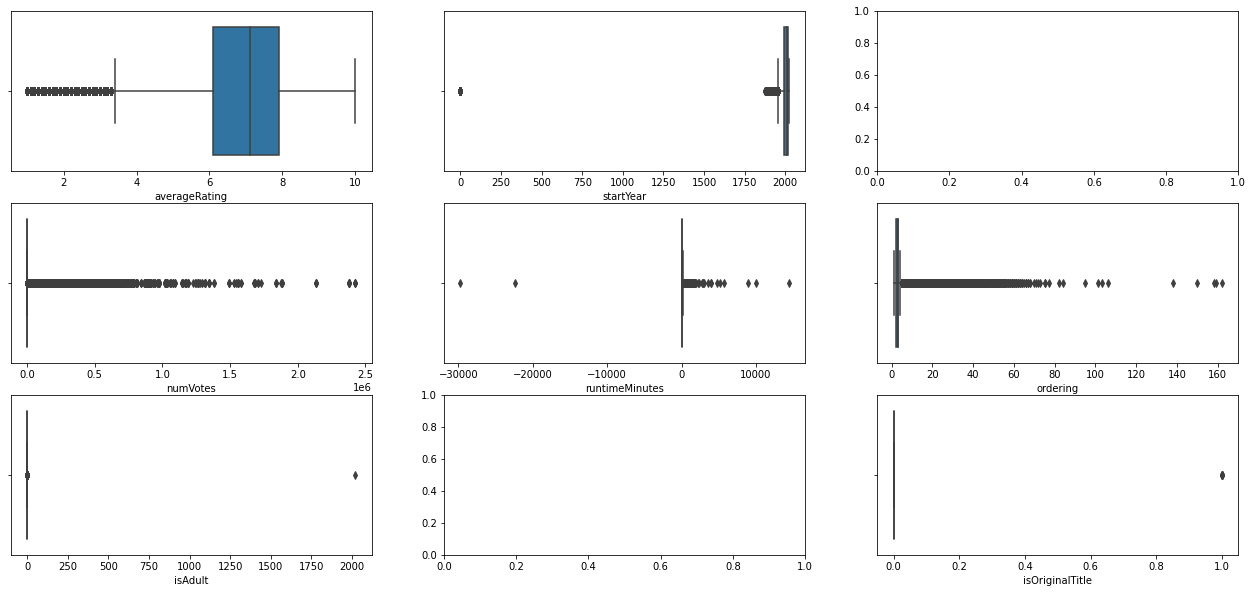

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(22, 10))

sb.boxplot(x=base["averageRating"],ax=axs[0,0])
sb.boxplot(x=base["numVotes"],ax=axs[1,0])
sb.boxplot(x=base["isAdult"],ax=axs[2,0])
sb.boxplot(x=base["startYear"],ax=axs[0,1])
sb.boxplot(x=base["runtimeMinutes"],ax=axs[1,1])
sb.boxplot(x=base["ordering"],ax=axs[1,2])
sb.boxplot(x=base["isOriginalTitle"],ax=axs[2,2])

plt.show()

### **Tratamiento Outliers**

**Variable *startYear***

In [ ]:
base.groupby('startYear')[['Id']].count()

,Id
startYear,
0,168
1877,1
1878,3
1881,1
1885,1
...,...
2017,43845
2018,43662
2019,43138


In [ ]:
base = base.drop(base[base['startYear']==0].index)

**Variable *runtimeMinutes***

In [ ]:
base.groupby('runtimeMinutes')[['Id']].count()

,Id
runtimeMinutes,
-29745,1
-22336,1
0,258132
1,3068
2,3714
...,...
5220,1
5700,1
9000,1


In [ ]:
base = base.drop(base[base['runtimeMinutes'] < 0].index)

**Variable *ordering*** 

In [ ]:
base.groupby('ordering')[['Id']].count()

,Id
ordering,
1,138950
2,118531
3,638365
4,17086
5,11407
...,...
138,1
150,1
158,1


In [ ]:
base = base.drop(base[base['ordering'] > 130].index)

**Variable *isAdult*** 

In [ ]:
base.groupby('isAdult')[['Id']].count()

,Id
isAdult,
0.0,959050
1.0,18316


In [ ]:
base.isAdult.replace(2020,0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
977536    0.0
977537    0.0
977538    0.0
977539    0.0
977540    0.0
Name: isAdult, Length: 977366, dtype: float64

## Split

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, plot_tree

Quiero ver qué géneros son los más populares para utilizar esos en mis modelos predictivos

In [ ]:
def suma(df,columna):
  aux = df[df[columna].notnull()]
  sumacol = np.sum(aux[columna])
  return [sumacol]

In [ ]:
vars_num = base.select_dtypes(exclude = 'object').drop(columns = 'Id').columns
datos_cols = {key: None for key in vars_num}

for columna in vars_num:
    sumacolumna = suma(base,columna)[0]
    datos_cols[columna] = sumacolumna
    print(columna,": ",sumacolumna , "\n\n")

averageRating :  6725493.1 


numVotes :  1582077870 


isAdult :  18316.0 


startYear :  1954443904 


endYear :  56681977 


runtimeMinutes :  40509597 


seasonNumber :  1767575.0 


episodeNumber :  24111437.0 


ordering :  3107583 


language :  1965 


isOriginalTitle :  7 


0 :  44602 


Action :  118502 


Adult :  17743 


Adventure :  102816 


Animation :  109570 


Biography :  19432 


Comedy :  304024 


Crime :  99253 


Documentary :  116153 


Drama :  319905 


Family :  71434 


Fantasy :  40998 


Film-Noir :  1080 


Game-Show :  15207 


History :  25003 


Horror :  42475 


Music :  46893 


Musical :  10193 


Mystery :  45479 


News :  13065 


Reality-TV :  23273 


Romance :  72683 


Sci-Fi :  27712 


Short :  130593 


Sport :  18343 


Talk-Show :  29157 


Thriller :  39781 


War :  11013 


Western :  13151 


es_serie :  512686 


es_peli :  445213 


es_otro :  19467 


buena_puntuacion :  45848 


dir_popular :  569 


director_p :  318040 


e

In [ ]:
# GENEROS MAS POPULARES

#Drama :  319905 
#Comedy :  304024
#Short :  130593 
#Action :  118502 
#Documentary :  116153 
#Animation :  109570 
#Adventure :  102816 

In [ ]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit

In [ ]:
cols_seleccionadas = ['numVotes' , 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'ordering', 'language', 'isOriginalTitle', 
                      'Comedy', 'Drama', 'Documentary', 'Short', 'Action',  'Adventure', 'Animation', 
                      'es_serie', 'es_peli', 'buena_puntuacion', 'dir_popular']

X = base[cols_seleccionadas]
y = base['averageRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(830761, 19)
(146605, 19)
(830761,)
(146605,)


## Modelos

#### Modelo: Regresión Lineal

**Simple**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
simple = LinearRegression()

In [ ]:
simple.fit(X = X_train, y = y_train)

LinearRegression()

In [ ]:
simple.score(X = X_train, y = y_train)

0.15989162114540179

In [ ]:
simple.score(X = X_test, y = y_test)

0.16181778851838025

**Multiple**

In [ ]:
from sklearn import datasets, linear_model

In [ ]:
lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_multiple.score(X_train, y_train)

0.15989162114540179


In [ ]:
lr_multiple.score(X_test, y_test)

0.16173120324665524


#### Modelo: Árboles de Decisión

In [ ]:
arbol = DecisionTreeRegressor(random_state = 0).fit(X_train,y_train)

In [ ]:
pred_train = arbol.predict(X_train)

In [ ]:
pred = pd.DataFrame(pred_train)
y_test['result'] = pred

In [ ]:
y_test['result'] = y_test['averageRating'].reset_index(drop=True)

In [ ]:
y_test = y_test.dropna()
y_test.head(10)

#### Modelo: XGBoost

In [ ]:
!pip install xgboost pandas sklearn

In [ ]:
from xgboost import XGBRegressor
from numpy import array
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from urllib.request import urlretrieve
from sklearn.model_selection import GridSearchCV

In [ ]:
param_gridXGB = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [ ]:
model = XGBRegressor()

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = param_gridXGB, 
                          cv = 3, n_jobs = 5, verbose = True)

In [ ]:
grid_search.fit(X_train, y_train) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [ ]:
print(grid_search.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
print(grid_search.best_score_)

0.3007494189797893


In [ ]:
fila = []

for i in range(10,21,2):
  # 'colsample_bytree': 0.7, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7
  regr2 = XGBRegressor(max_depth = i, l2_leaf_reg = 0.2, iterations = 800, learning_rate = 0.2, colsample_bytree = 0.7, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:linear', silent = 1, subsample = 0.7)
  fregr2 = regr2.fit(X_train,y_train)
  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  rto = fila.append([i,r2_train,r2_test])
  print(i, r2_train, r2_test)

10 0.45540545101397545 0.31751163019074413
12 0.555041121112062 0.3015457777314593
14 0.6496783201793279 0.26602139935455293
16 0.7167274420108083 0.2216845206705852
18 0.7568867012526485 0.18506243535136946
20 0.776333009693352 0.15679691739318857


In [ ]:
modeloXG = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.07, max_depth= 10, min_child_weight = 4, n_estimators = 500, 
                        nthread = 4, objective = "reg:linear", silent = 1, subsample = 0.7)

modeloXG.fit(X_train, y_train)
modeloXG.score(X_test, y_test)

0.3232045943894042

#### Modelo: CatBoost

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
model = CatBoostRegressor(loss_function="RMSE")

In [ ]:
train_dataset = Pool(X_train, y_train) 
test_dataset = Pool(X_test, y_test)

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1, 0.15, 0.2],
        'depth': [6, 8, 10 ,12],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

Se han truncado las últimas 5000 líneas del flujo de salida.
136:	learn: 1.2140125	test: 1.2223728	best: 1.2223728 (136)	total: 33.7s	remaining: 3.2s
137:	learn: 1.2135408	test: 1.2219107	best: 1.2219107 (137)	total: 34s	remaining: 2.96s
138:	learn: 1.2131165	test: 1.2214912	best: 1.2214912 (138)	total: 34.3s	remaining: 2.71s
139:	learn: 1.2125694	test: 1.2209489	best: 1.2209489 (139)	total: 34.5s	remaining: 2.47s
140:	learn: 1.2120344	test: 1.2204424	best: 1.2204424 (140)	total: 34.8s	remaining: 2.22s
141:	learn: 1.2116246	test: 1.2200343	best: 1.2200343 (141)	total: 35.1s	remaining: 1.97s
142:	learn: 1.2112772	test: 1.2196968	best: 1.2196968 (142)	total: 35.3s	remaining: 1.73s
143:	learn: 1.2109385	test: 1.2193692	best: 1.2193692 (143)	total: 35.6s	remaining: 1.48s
144:	learn: 1.2102303	test: 1.2187218	best: 1.2187218 (144)	total: 35.8s	remaining: 1.24s
145:	learn: 1.2098465	test: 1.2183409	best: 1.2183409 (145)	total: 36.1s	remaining: 990ms
146:	learn: 1.2093672	test: 1.2178784	best

{'params': {'depth': 12,
  'iterations': 200,
  'learning_rate': 0.2,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 1.15
R2: 0.32


In [ ]:
#PARAMETROS {'params': {'depth': 12,'iterations': 200,'learning_rate': 0.2,'l2_leaf_reg': 0.2},
modeloCBR = CatBoostRegressor(depth = 12 , iterations = 200 , learning_rate = 0.2, l2_leaf_reg = 0.2 )

In [ ]:
CBR = modeloCBR.fit(X_train, y_train)

0:	learn: 1.3490026	total: 462ms	remaining: 1m 32s
1:	learn: 1.3089737	total: 801ms	remaining: 1m 19s
2:	learn: 1.2799214	total: 1.13s	remaining: 1m 14s
3:	learn: 1.2604765	total: 1.47s	remaining: 1m 12s
4:	learn: 1.2450949	total: 1.83s	remaining: 1m 11s
5:	learn: 1.2343128	total: 2.17s	remaining: 1m 10s
6:	learn: 1.2267865	total: 2.5s	remaining: 1m 9s
7:	learn: 1.2216551	total: 2.81s	remaining: 1m 7s
8:	learn: 1.2175505	total: 3.14s	remaining: 1m 6s
9:	learn: 1.2141461	total: 3.51s	remaining: 1m 6s
10:	learn: 1.2102279	total: 3.87s	remaining: 1m 6s
11:	learn: 1.2080986	total: 4.21s	remaining: 1m 5s
12:	learn: 1.2060401	total: 4.57s	remaining: 1m 5s
13:	learn: 1.2041512	total: 4.92s	remaining: 1m 5s
14:	learn: 1.2027839	total: 5.27s	remaining: 1m 4s
15:	learn: 1.2017425	total: 5.65s	remaining: 1m 4s
16:	learn: 1.2008812	total: 6.02s	remaining: 1m 4s
17:	learn: 1.1999759	total: 6.4s	remaining: 1m 4s
18:	learn: 1.1982722	total: 6.75s	remaining: 1m 4s
19:	learn: 1.1975027	total: 7.07s	rem

In [ ]:
CBR.score(X_test, y_test)

0.31641331984414134

In [ ]:
CBR.get_feature_importance()

array([13.16323545,  0.76540178, 16.2006886 ,  1.41322621, 15.60731278,
        4.97112265,  0.0270035 ,  0.        ,  4.54353292,  7.35459395,
        8.13195131,  1.8811223 ,  2.94146235,  2.83125279,  3.04851467,
        5.2375217 , 11.54259592,  0.27945671,  0.06000441])

Pruebo sacando la variable que no tiene importancia:
* 7 = isOriginalTitle

In [ ]:
X_train2 = X_train.drop(['isOriginalTitle'], axis = 1)
X_test2 = X_test.drop(['isOriginalTitle'], axis = 1)

In [ ]:
model = CatBoostRegressor(loss_function="RMSE")

In [ ]:
train_dataset = Pool(X_train2, y_train) 
test_dataset = Pool(X_test2, y_test)

In [ ]:
grid = {'iterations': [200, 500, 900, 1000],
        'learning_rate': [0.2, 0.4],
        'depth': [8, 10, 12, 30],
        'l2_leaf_reg': [0.2, 0.5, 1]}
model.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
26:	learn: 1.1982796	test: 1.2082499	best: 1.2082499 (26)	total: 7.02s	remaining: 4m 12s
27:	learn: 1.1967373	test: 1.2069874	best: 1.2069874 (27)	total: 7.28s	remaining: 4m 12s
28:	learn: 1.1953013	test: 1.2057354	best: 1.2057354 (28)	total: 7.57s	remaining: 4m 13s
29:	learn: 1.1938335	test: 1.2045069	best: 1.2045069 (29)	total: 7.86s	remaining: 4m 14s
30:	learn: 1.1932699	test: 1.2039896	best: 1.2039896 (30)	total: 8.11s	remaining: 4m 13s
31:	learn: 1.1922865	test: 1.2031899	best: 1.2031899 (31)	total: 8.38s	remaining: 4m 13s
32:	learn: 1.1916066	test: 1.2025765	best: 1.2025765 (32)	total: 8.63s	remaining: 4m 13s
33:	learn: 1.1911906	test: 1.2022004	best: 1.2022004 (33)	total: 8.91s	remaining: 4m 13s
34:	learn: 1.1901953	test: 1.2014659	best: 1.2014659 (34)	total: 9.18s	remaining: 4m 13s
35:	learn: 1.1896663	test: 1.2009840	best: 1.2009840 (35)	total: 9.43s	remaining: 4m 12s
36:	learn: 1.1889707	test: 1.2004029	best: 1.2004029 (36)	t

{'params': {'depth': 12,
  'l2_leaf_reg': 1,
  'iterations': 1000,
  'learning_rate': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [ ]:
# {'depth': 12, 'l2_leaf_reg': 1, 'iterations': 1000, 'learning_rate': 0.2}
modeloCBR2 = CatBoostRegressor(depth = 12, iterations = 1000 , learning_rate = 0.2 , l2_leaf_reg = 1 )
modeloCBR2.fit(X_train2, y_train)

0:	learn: 1.3476147	total: 326ms	remaining: 5m 25s
1:	learn: 1.3062996	total: 867ms	remaining: 7m 12s
2:	learn: 1.2780541	total: 1.4s	remaining: 7m 46s
3:	learn: 1.2585920	total: 2.02s	remaining: 8m 21s
4:	learn: 1.2446636	total: 2.77s	remaining: 9m 11s
5:	learn: 1.2332617	total: 3.64s	remaining: 10m 2s
6:	learn: 1.2262490	total: 4.34s	remaining: 10m 15s
7:	learn: 1.2206921	total: 4.99s	remaining: 10m 18s
8:	learn: 1.2158595	total: 5.65s	remaining: 10m 22s
9:	learn: 1.2125129	total: 6.33s	remaining: 10m 27s
10:	learn: 1.2091963	total: 6.95s	remaining: 10m 24s
11:	learn: 1.2070916	total: 7.45s	remaining: 10m 13s
12:	learn: 1.2040481	total: 8.1s	remaining: 10m 15s
13:	learn: 1.2026605	total: 8.71s	remaining: 10m 13s
14:	learn: 1.2015873	total: 9.35s	remaining: 10m 13s
15:	learn: 1.2001130	total: 9.91s	remaining: 10m 9s
16:	learn: 1.1992754	total: 10.6s	remaining: 10m 11s
17:	learn: 1.1983861	total: 11.3s	remaining: 10m 16s
18:	learn: 1.1971522	total: 11.9s	remaining: 10m 13s
19:	learn: 1

In [ ]:
model = CatBoostRegressor(loss_function="RMSE")

In [ ]:
modeloCBR2.score(X_test2, y_test)

0.3305107825000311

#### Modelo: ExtraTrees

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score

In [ ]:
etr = ExtraTreesRegressor()

In [ ]:
param_grid =  {
    'bootstrap': [True],
    'max_depth': range(10,50,20),
    'max_features': range(7,42,7),
    'min_samples_leaf': range(3,12,4),
    'n_estimators': [200]
}

In [ ]:
modelo = ExtraTreesRegressor(n_estimators=200, max_features="sqrt", random_state=0)

In [ ]:
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring="r2")

_ = grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': 14, 'min_samples_leaf': 3, 'n_estimators': 200}


In [ ]:
#PARAMETROS: 'bootstrap': True, 'max_depth': 30, 'max_features': 14, 'min_samples_leaf': 3, 'n_estimators': 200
modeloETR = ExtraTreesRegressor(bootstrap = True, n_estimators=200, max_features=14, random_state=0, max_depth=30, min_samples_leaf=3)

In [ ]:
ETR = modeloETR.fit(X_train, y_train)

In [ ]:
ETR.score(X_train, y_train)

0.4429422463596294

In [ ]:
ETR.score(X_test, y_test)

0.3421870537998505

#### Modelo: Random Forest

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score

In [ ]:
#prubeo un primer random forest con parámetros aleatorios
model = RandomForestRegressor(bootstrap = True, max_depth = 30, max_features = 8, min_samples_leaf = 3,  n_estimators = 100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=8, min_samples_leaf=3)

In [ ]:
model.score(X_test , y_test)

0.3492676109919144

GridSearch

In [ ]:
param_gridRF = {
    'bootstrap': [True],
    'max_depth': [40, 60, 90],
    'max_features': [2, 8],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100]
}

In [ ]:
model = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = param_gridRF, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [40, 60, 90],
                         'max_features': [2, 8], 'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [100]},
             verbose=2)

In [ ]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 60, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 100}


In [ ]:
print(grid_search.best_score_)

In [ ]:
#{'bootstrap': True, 'max_depth': 60, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 100}
model = RandomForestRegressor(bootstrap = True, max_depth = 60, max_features = 8, min_samples_leaf = 4,  n_estimators = 100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, max_features=8, min_samples_leaf=4)

In [ ]:
model.score(X_test , y_test)

0.35310480553713486

Mejora mi R2 --> 0.353 > 0.349

Busco mejorar los hiperparámetros

**max_depth**

In [ ]:
fila = []

for i in range(20,100,20):
  print(i)
  regr2 = RandomForestRegressor(max_depth=i)
  fregr2 = regr2.fit(X_train,y_train)
  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila.append([i,r2_train,r2_test])
  print(i,r2_train,r2_test)

20
20 0.5338369760515732 0.3423082173451918
40
40 0.7385723507671387 0.28628787930066957
60
60 0.7386894629253999 0.28622535301908836
80
80 0.738745592773598 0.28585160699194656


In [ ]:
prof = pd.DataFrame(fila, columns=["max_depth","r2_train","r2_test"])
prof

,max_depth,r2_train,r2_test
0,20,0.533837,0.342308
1,40,0.738572,0.286288
2,60,0.738689,0.286225
3,80,0.738746,0.285852


**max_features**

In [ ]:
fila = []

for i in range(2,12,2):
  print(i)
  regr2 = RandomForestRegressor(max_depth = 20 , max_features=i)
  fregr2 = regr2.fit(X_train,y_train)
  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila.append([i,r2_train,r2_test])
  print(i,r2_train,r2_test)

2
2 0.38321949783912734 0.31683477853999864
4
4 0.42303489391887483 0.33128952485274754
6
6 0.4617180015955489 0.3411302608781003
8
8 0.4833919152645476 0.3453659588013397
10
10 0.5008973037592774 0.34700446422334064


In [ ]:
features = pd.DataFrame(fila, columns=["max_features","r2_train","r2_test"])
features

,max_features,r2_train,r2_test
0,2,0.383219,0.316835
1,4,0.423035,0.331290
2,6,0.461718,0.341130
3,8,0.483392,0.345366
4,10,0.500897,0.347004


**min_samples_leaf**

In [ ]:
fila = []

for i in range(1,6,1):
  print(i)
  regr2 = RandomForestRegressor(max_depth = 20 , max_features= 10 , min_samples_leaf = i)
  fregr2 = regr2.fit(X_train,y_train)
  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila.append([i,r2_train,r2_test])
  print(i,r2_train,r2_test)

1
1 0.5019784090522557 0.34786871137162223
2
2 0.47387875238709953 0.3479561275568639
3
3 0.45542150731018927 0.34647514292697246
4
4 0.44175408404349203 0.3452337317990726
5
5 0.4310457948361345 0.34405154738185206


In [ ]:
leaf = pd.DataFrame(fila, columns=["min_samples_leaf","r2_train","r2_test"])
leaf

,min_samples_leaf,r2_train,r2_test
0,1,0.501978,0.347869
1,2,0.473879,0.347956
2,3,0.455422,0.346475
3,4,0.441754,0.345234
4,5,0.431046,0.344052


**n_estimators**

In [ ]:
fila = []

for i in range(100,500,100):
  print(i)
  regr2 = RandomForestRegressor(max_depth = 20, max_features= 10, min_samples_leaf = 2, n_estimators = i)
  fregr2 = regr2.fit(X_train,y_train)
  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila.append([i,r2_train,r2_test])
  print(i,r2_train,r2_test)

100
100 0.4742936509208172 0.3478416744667977
200
200 0.4746427268551271 0.34841217421160264
300
300 0.47469129906433816 0.34873687226078287
400
400 0.47463632326299654 0.3485943497264492


In [ ]:
estim = pd.DataFrame(fila, columns=["n_estimators","r2_train","r2_test"])
estim

,n_estimators,r2_train,r2_test
0,100,0.474294,0.347842
1,200,0.474643,0.348412
2,300,0.474691,0.348737
3,400,0.474636,0.348594


**bootstrap**

El bootstrap en el Random Forest debe estar en True, dado que sino lo que se estaría haciendo no es exactamente un RF. 

In [ ]:
model = RandomForestRegressor(bootstrap = True, max_depth = 20, max_features = 10, min_samples_leaf = 2,  n_estimators = 300)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.348300157014767

No mejora: 0.348 < 0.353. 

Me quedo con los parámetros del GridSearch

## Salida

In [ ]:
# Salida
resultado = model.predict(test[cols_seleccionadas])

salida = pd.DataFrame(data={"averageRating": resultado}).astype(str)
salida.index = test.Id
salida.to_csv("RandomForest.csv", sep=',', index=True,  index_label='Id')